<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activies/Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##➛About this tutorial

Jan 17, 2020

This Python and Numpy turorial (`part II - Numpy`) was adapted by [Badri Adhikari](https://badriadhikari.github.io/) from the original adaptation by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/). Expanded the broadcasting section by adapting [this tutorial](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

##➛Introduction to Numpy
Numpy [documentation](http://docs.scipy.org/doc/numpy/reference/).

* Numpy is the **core library** for scientific computing in Python
* It provides (a) a **high-performance** multidimensional array object, and (b) **tools** for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [2]:
import numpy as np

##➛Arrays

* A numpy array is a **grid of values, all of the "same type"**, and is **indexed by a tuple of nonnegative integers**.  
* Numpy only supports numeric data types such as np.int8, np.int32, np.float32, np.half (float 16), etc.
* The number of dimensions is the **rank of the array**. For example an array of dimensions 2x3x4 has rank 3.  
* The **shape of an array is a tuple of integers** giving the size of the array along each dimension.
* We can initialize numpy arrays from nested Python lists. For example, `x = [[2,3][4,5]]`
* Elements can be accessed using square brackets. For example, `print( x[0] )`

**Caution! Python arrays and Numpy arrays are different objects!**  
For example, `type` only works with Python data structures `shape` works with numpy arrays.  
![](https://raw.githubusercontent.com/badriadhikari/AI-2020spring/master/supporting_files/important.png?raw=true)


In [3]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 's'                # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3


ValueError: ignored

In [4]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)
assert(b.shape == (2,3))

[[1 2 3]
 [4 5 6]]


In [5]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


**"`shape`" is your hammer!**  
![](https://raw.githubusercontent.com/badriadhikari/AI-2020spring/master/supporting_files/hammer.png?raw=true)

Numpy also provides many functions to create arrays:

In [6]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [7]:
b = np.ones((1,2, 5, 6, 7))   # Create an array of all ones
print(b)

[[[[[1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]]

   [[1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]]

   [[1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]]

   [[1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]]

   [[1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]]]


  [[[1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]
    [1. 1. 1. 1. 1. 1. 1.]]

   [[1. 1. 1. 

In [8]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [9]:
d = np.eye(3)        # Create a 2x2 identity matrix
print(d)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [10]:
e = np.random.random((2,2)) * 100 # Create an array filled with random values
print(e)

[[14.00340778 75.27160001]
 [89.79188517 48.16625651]]


##➛Array indexing

* Numpy offers **several ways to index into arrays**
* **Slicing**: Similar to Python lists, numpy arrays can be sliced
* Since arrays may be multidimensional, you must specify a slice for each dimension of the array

Here is an example matrix of **`shape (3, 4)`** (3 rows and 4 columns) and **`rank 2`** : 
<table align="left">
<tr>
<td>1</td>
<td><b>2</b></td>
<td><b>3</b></td>
<td>4</td>
</tr>
<tr>
<td>5</td>
<td><b>6</b></td>
<td><b>7</b></td>
<td>8</td>
</tr>
<tr>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
</tr>
</table>

In [11]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
assert(a.shape == (3, 4))
# Use slicing to pull out the subarray consisting of the first 2 rows and columns 1 and 2
b = a[:2, 1:3]
assert(b.shape == (2,2))
print( b )

[[2 3]
 [6 7]]


A **slice of an array is a view into the same data**, so modifying it will modify the original array.  
![](https://raw.githubusercontent.com/badriadhikari/AI-2020spring/master/supporting_files/important.png?raw=true)

<table align="left">
<tr>
<td>1</td>
<td><b><font color='red'>2</font></b></td>
<td><b>3</b></td>
<td>4</td>
</tr>
<tr>
<td>5</td>
<td><b>6</b></td>
<td><b>7</b></td>
<td>8</td>
</tr>
<tr>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
</tr>
</table>

In [12]:
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print( a )

[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


**Then, how can we make a copy (not reference) of an array?**

In [13]:
c = np.copy(a)
c[0, 0] = 100
print(c)
print(a)

[[100  77   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]
[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


You can also **mix integer indexing with slice indexing**. However, doing so will yield an array of lower rank than the original array.

In [14]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array:
1. Mixing integer indexing with slices yields an array of lower rank.
2. Using only slices yields an array of the same rank as the original array.

<table align="left">
<tr>
<td>1</td>
<td>2</td>
<td>3</td>
<td>4</td>
</tr>
<tr>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8</td>
</tr>
<tr>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
</tr>
</table>

In [15]:
row_r1 = a[1, :]       # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]     # Rank 2 view of the second row of a
row_r3 = a[[1], :]     # Rank 2 view of the second row of a
print( row_r1, row_r1.shape )
print( row_r2, row_r2.shape )
print( row_r3, row_r3.shape )

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [16]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print( col_r1, col_r1.shape )
print( col_r2, col_r2.shape )

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing**  
When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [17]:
a = np.array([[1,2], [3, 4], [5, 6]])
print ('a = ')
print(a)

a = 
[[1 2]
 [3 4]
 [5 6]]


In [20]:
# An example of integer array indexing.
# The returned array will have shape (2,)
print (' => ')
print( a[[0, 1], [0, 1]] )
assert( a[[0,1], [0,1]].shape == (2,))

 => 
[1 4]


In [42]:
# The returned array will have shape (3,)
print (' => ')
print( a[[0, 1, 2], [0, 1, 0]] )
assert( a[[0, 1, 2], [0,1,0]].shape == (3,))

# Practice notation differences between the two
print( a[ [0,2], [0,1] ] )
print( np.array( [a[0,0], a[2, 1]] ))

 => 
[1 4 5]
[1 6]
[1 6]


In [41]:
# The above example of integer array indexing is equivalent to this:
print (' => ')
print( np.array([a[0, 0], a[1, 1], a[2, 0]]) )
assert( np.array([a[0, 0], a[1, 1], a[2, 0]]).shape ==(3,) )

 => 
[1 4 5]


In [39]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is **selecting** or mutating **one element from each row of a matrix**:

In [43]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [44]:
# Create an array of indices
b = np.array([0, 2, 0, 1])
print(b)
assert(b.shape == (4,))

[0 2 0 1]


In [46]:
print(np.arange(4))
# Select one element from each row of a using the indices in b
print( a[np.arange(4), b] ) # Prints "[ 1  6  7 11]"

[0 1 2 3]
[ 1  6  7 11]


![](https://github.com/badriadhikari/AI-2020spring/blob/master/supporting_files/integer_indexing.png?raw=true)

In [65]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)


[[171   2   3]
 [  4   5 176]
 [177   8   9]
 [ 10 181  12]]


**Boolean array indexing**  
Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [67]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)
assert( a.shape == (3,2))

[[1 2]
 [3 4]
 [5 6]]


In [68]:
bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.
print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [69]:
# We use boolean array indexing to construct a "rank 1 array"
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

[3 4 5 6]


In [71]:
# We can do all of the above in a single concise statement:
print(a[a > 2])

## Get the even elements within the numpy array
print(a[a % 2 == 0])

[3 4 5 6]
[2 4 6]


##➛Datatypes

* Every numpy array is a grid of elements **of the same type** (unlike a Python list)
* Numpy provides a large set of numeric datatypes that you can use to construct arrays
* Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype


In [72]:
x = np.array([1, 2])      # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype = np.int32)  # Force a particular datatype

print( x.dtype, y.dtype, z.dtype )

int64 float64 int32


Datatypes [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

##➛Array math

* Basic mathematical functions operate elementwise on arrays
* These are available as both (a) operator overloads, and (b) functions in the numpy module

In [77]:
x = np.array([[1,2],[3,4]], dtype = np.float64)
y = np.array([[5,6],[7,8]], dtype = np.float64)

# Elementwise sum; both produce the array
print(x + y)         # operator overload
print(np.add(x, y))  # add available as function

##View the first column
print(np.add(x,y)[:,0])

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[ 6. 10.]


In [78]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [79]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

##View the first column
print(np.multiply(x,y)[:,0])

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[ 5. 21.]


In [81]:
# Elementwise division; both produce the array
print(x / y)
print(np.divide(x, y))

##View the first column
print(np.divide(x,y)[:,0])

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[0.2        0.42857143]


In [ ]:
# Elementwise square root; produces the array
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Elementwise Multiplication vs Dot Product:
* `*` is elementwise multiplication, **not matrix multiplication**
* Use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices
* `dot` is available both as a function in the numpy module and as an instance method of array objects

**Dot Product** 
* `.dot()` function returns the dot product of two arrays
* For 1-D arrays, it is the inner product of the vectors
* For 2-D vectors, it is the equivalent to matrix multiplication
* If the dimensions don't match for matrix multiplication, it performs matrix/vector multiplication
* For N-dimensional arrays, it is a sum product over the last axis of a and the second-last axis of b

![](https://github.com/badriadhikari/AI-2020spring/blob/master/supporting_files/dot_product.png?raw=true)

**Examples:**

In [84]:
v = np.array([9,10])
w = np.array([11, 12])
# Inner product of vectors
print(v.dot(w))
print(np.dot(v, w))

##Assert the value
assert(np.dot(v,w) == (v[0] * w[0] + v[1] * w[1]) )

219
219


In [89]:
x = np.array([[1,2],[3,4]])
# Matrix / vector product; both produce the rank 1 array
print(x.dot(v))
print(np.dot(x, v))

xformed = np.dot(x,v)

##Retrieve the original vector
print(np.dot( np.linalg.inv(x), xformed ) )

[29 67]
[29 67]
[ 9. 10.]


In [91]:
y = np.array([[5,6],[7,8]])
# Matrix / matrix product; both produce the rank 2 array
print(x * y)
print(np.dot(x, y))

xformed = np.dot(x,y)

##Retrieve the original matrix
print(np.dot( np.linalg.inv(x), xformed ))

[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]
[[5. 6.]
 [7. 8.]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [92]:
import numpy as np
x = np.array([[1,2],[3,4]])
print('x =')
print(x)
print('sum =')
print(np.sum(x))          # Compute sum of all elements
print('sum along axis 0 =')
print(np.sum(x, axis=0))  # Compute sum of each column
print('sum along axis 1 =')
print(np.sum(x, axis=1))  # Compute sum of each row

x =
[[1 2]
 [3 4]]
sum =
10
sum along axis 0 =
[4 6]
sum along axis 1 =
[3 7]


To transpose a matrix, simply use the T attribute of an array object:

In [95]:
print(x)
print(x.T)

##Assert that tranposes were applied
assert( x[1,0] == x.T[0,1] )
assert( x[0,0] == x.T[0,0] ) # Diagonabl element unchanged

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


Numpy arrays can also be reshaped using `.reshape()`

In [96]:
x = np.array([[1,2],[3,4]])
print(x.shape)

y = np.reshape(x, (1, 4))
print(y.shape)
print(y)

(2, 2)
(1, 4)
[[1 2 3 4]]


Mathematical functions [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

##➛Introduction to Broadcasting (intuition)

* Broadcasting is a powerful mechanism that **allows numpy to work with arrays of different shapes when performing arithmetic operations**
* Frequently we have **a smaller array and a larger array**, and we want to **use the smaller array multiple times to perform some operation on the larger array**

Suppose that we want to add a constant vector to each row of a matrix:

In [98]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x
print('x: ', x)
print('v: ', v)

x:  [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
v:  [1 0 1]


We would like to add `v` to `x`. Here is a naive way of doing so (**Method 1**):

In [99]:
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    x[i, :] = x[i, :] + v
print(x)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


**This works**; however when the matrix `x` is very large, computing an explicit loop in Python **could be slow**.

Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this (**Method 2**):

In [103]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
assert( vv.shape == (4,3))
print(vv)                

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [104]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 3  2  5]
 [ 6  5  8]
 [ 9  8 11]
 [12 11 14]]


Numpy broadcasting allows us to perform this computation **without actually creating multiple copies of v**. Consider this version, **using broadcasting** (**Method 3**):

In [105]:
import numpy as np

# We will add the vector v to each row of the matrix x,
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting

print(x)
print('')
print(v)
print('')
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[1 0 1]

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


##➛Broadcasting  
* The term "broadcasting" describes how numpy treats arrays with different shapes during arithmetic operations
* The smaller array is "broadcast" across the larger array so that they have compatible shapes

The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [106]:
import numpy as np
a = np.array([1.0, 2.0, 3.0])
b = 2.0
print(a * b)

[2. 4. 6.]


**Explanation:**
* We can think of the **scalar b being stretched during the arithmetic operation** into an array with the same shape as a
* The new elements in b are simply copies of the original scalar
* The **stretching analogy is only conceptual**. NumPy is smart enough to use the original scalar value **without actually making copies**, so that broadcasting operations are **as memory and computationally efficient** as possible.

##➛Broadcasting Rules

When operating on two arrays, NumPy **compares their shapes element-wise**. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible for broadcasting when

1. they are equal, or
1. one of them is 1

If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have incompatible shapes. The **size of the resulting array is the maximum size along each dimension of the input arrays**.

Arrays do not need to have the same number of dimensions. For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:
```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3  
Result (3d array): 256 x 256 x 3
```
![](https://github.com/badriadhikari/AI-2020spring/blob/master/supporting_files/broadcasting.png?raw=true)

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other. Here, the scaling vector can be thought of having the dimensions `1 x 1 x 3`.

##➛Broadcasting Examples

Examples where broadcasting works:

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4
```

```
A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4
```

```
A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5
```

```
A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5
```

```
A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```

Examples of shapes that do not broadcast:
```
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match
```
```
A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
```

**Practice Example 1:**

In [107]:
x = np.arange(4)
y = np.ones(5)
print(x, x.shape)
print(y, y.shape)

[0 1 2 3] (4,)
[1. 1. 1. 1. 1.] (5,)


In [108]:
# What will be the output?
print((x + y).shape)

ValueError: ignored

**Practice Example 2:**

In [109]:
xx = x.reshape(4,1)
print(xx, xx.shape)
print(y, y.shape)

[[0]
 [1]
 [2]
 [3]] (4, 1)
[1. 1. 1. 1. 1.] (5,)


In [110]:
# What will be the output?
print((xx + y).shape)
assert( (xx + y).shape == (4,5))

(4, 5)


##➛Outer Product using Broadcasting

Broadcasting provides a convenient way of taking the outer product (or any other outer operation) of two arrays. The following **example shows an outer product operation** of two 1-d arrays:

In [111]:
import numpy as np

a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])

print(a, a.shape)
print(b, b.shape)

[ 0. 10. 20. 30.] (4,)
[1. 2. 3.] (3,)


In [112]:
print(a * b)

ValueError: ignored

![](https://github.com/badriadhikari/2019-Fall-AI/blob/master/supporting_files/outer_product.png?raw=true)


In [113]:
#Here the newaxis index operator inserts a new axis into a, making it a two-dimensional 4x1 array
print( a * b.reshape(3,1) )

[[ 0. 10. 20. 30.]
 [ 0. 20. 40. 60.]
 [ 0. 30. 60. 90.]]


Functions that support broadcasting are known as universal functions. Here is the [list](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Broadcasting [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).


##➛Matplotlib



In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [16]:
# Computer x and y coordinates for sing curve

x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

print(x[:10], y[:10])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]


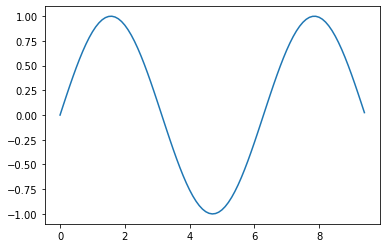

In [4]:
## Plot the points using matplotlib
plt.plot(x,y)
plt.show()

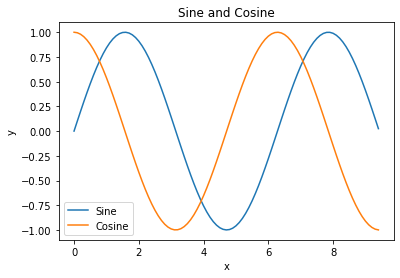

In [17]:
## Display multiple plots

y_sin = np.sin(x)
y_cos = np.cos(x)

## Plot points using matplotlib

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel( 'x' )
plt.ylabel( 'y' )
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

Plot Parabola

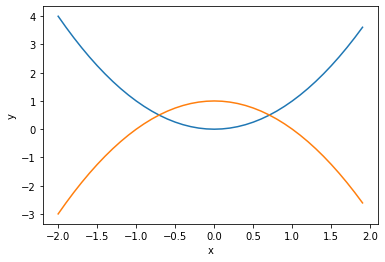

In [18]:
## Create the x and y values for a parabola
x_parabola = np.arange(-2, 2, 0.1)
y_pos = x_parabola * x_parabola
y_neg = -1 * y_pos + 1

## Plot the points

plt.plot(x_parabola, y_pos)
plt.plot(x_parabola, y_neg)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Multiple Plots

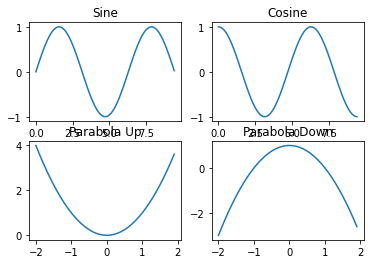

In [20]:
## Setup a subplot grid with height 2 and width 2
plt.subplot(2, 2, 1)

## Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

## Set second subplot as active to make second plot
plt.subplot(2, 2, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

## Set the third subplot as active to make third plot
plt.subplot(2, 2, 3)
plt.plot(x_parabola, y_pos)
plt.title('Parabola Up')

## Set the fourth subplot as active tomekt he fourth plot
plt.subplot(2, 2, 4)
plt.plot(x_parabola, y_neg)
plt.title('Parabola Down')

## Show the figure
plt.show()

##➛Plotly

In [21]:
!pip3 install plotly_express
import plotly.express as px

In [22]:
iris = px.data.iris()
print(iris.shape)
iris.head()

(150, 6)


,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [23]:
fig = px.scatter_3d(iris,
                    x = 'sepal_length',
                    y = 'sepal_width',
                    z = 'petal_width',
                    color = 'species')

fig.show()